In [28]:
import pandas as pd
df=pd.read_csv('./data/Pacientes2.csv', engine='python', index_col=0)
df.head()

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [4]:
# Variables Predictoras
X=df.iloc[:,1:11]
# Varaibles a predecir
Y=df.iloc[:,0]
X.head()
Y.head()

NOEXPED
1    NO
2    SI
3    SI
4    NO
5    NO
Name: Enfermedad, dtype: object

In [5]:
X.head()

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


In [6]:
Y.head()

NOEXPED
1    NO
2    SI
3    SI
4    NO
5    NO
Name: Enfermedad, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
# X_train, Y_train para entrenamiento
# X_test, Y_test para prueba
# test_size = 0.75 -> Toma el 75% de los datos para entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.75, random_state = 0)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 58 to 28
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   HIPERTEN  246 non-null    int64
 1   HIPERGLU  246 non-null    int64
 2   HDLBAJA   246 non-null    int64
 3   HIPERTRI  246 non-null    int64
 4   CINTALTA  246 non-null    int64
 5   EDAD      246 non-null    int64
 6   GENERO    246 non-null    int64
 7   FUMA      246 non-null    int64
 8   ALCOHOL   246 non-null    int64
 9   POLIURIA  246 non-null    int64
dtypes: int64(10)
memory usage: 21.1 KB


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Llamar al constructor del arbol de decision 
tree = DecisionTreeClassifier(max_depth = 4)

# Entrenamos el modelo
tree_enfermedad = tree.fit(X_train, Y_train)

print(tree_enfermedad)

DecisionTreeClassifier(max_depth=4)


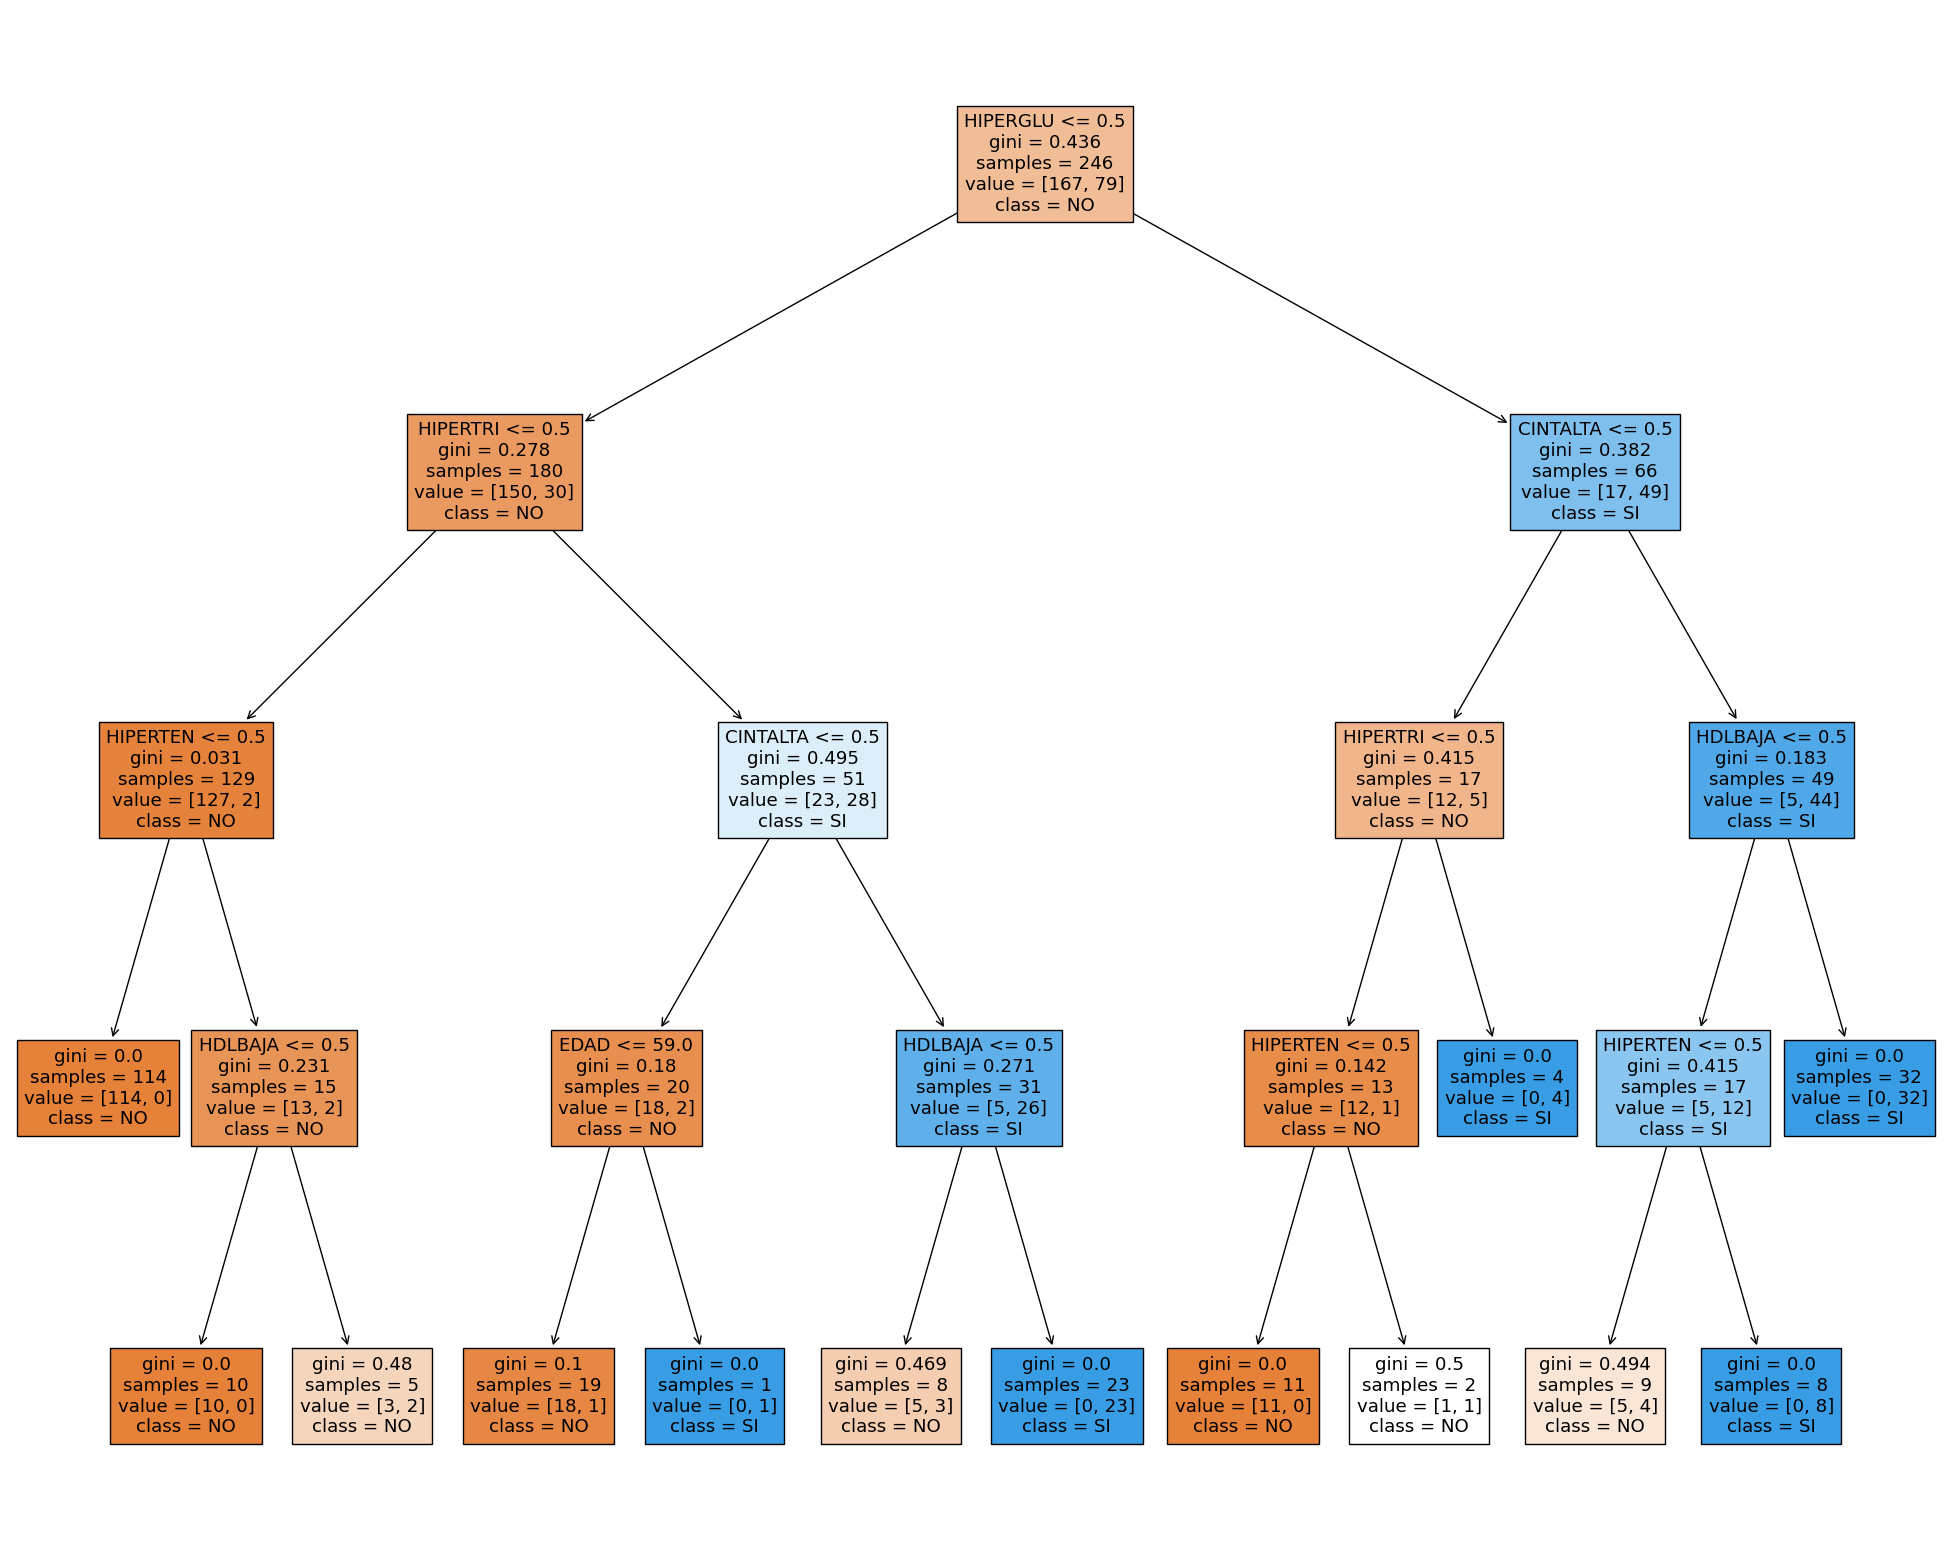

In [15]:
from matplotlib import pyplot as plt
from sklearn import tree
# Dimensiones del grafico
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_enfermedad, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)
plt.show()

In [27]:
fig.savefig("./output/ArbolDecision_01.png")

In [17]:
Y_pred=tree_enfermedad.predict(X_test)
print(Y_pred)

['SI' 'NO' 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'SI' 'SI' 'NO'
 'SI' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'NO' 'NO' 'SI'
 'NO' 'NO' 'SI' 'NO' 'SI' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'NO'
 'NO' 'NO' 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO' 'NO'
 'NO' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO' 'NO' 'SI' 'NO' 'NO' 'SI' 'NO' 'NO'
 'SI' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'NO' 'NO'
 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'SI' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI'
 'NO' 'NO' 'NO' 'SI' 'NO' 'NO' 'SI' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'NO'
 'NO' 

In [18]:
from sklearn.metrics import confusion_matrix

In [20]:
matrix_confution=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix(Y_test,Y_pred))


[[507  15]
 [ 50 167]]


In [22]:
import numpy as np 
global_precition = np.sum(matrix_confution.diagonal())/np.sum(matrix_confution)
print(global_precition)

0.912043301759134


In [24]:
global_precition_class_no = ((matrix_confution[0,0]))/sum(matrix_confution[0,])
print(global_precition_class_no)

0.9712643678160919


In [25]:
global_precition_class_si = ((matrix_confution[1,1]))/sum(matrix_confution[1,])
print(global_precition_class_si)

0.7695852534562212
